In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import model_analyzer as ma
import ml_pipe as ml

In [2]:
features = pd.read_csv('all_features.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
for x in features.columns:
    print(x, features[x].dtype)

ID_NUMBER object
FACILITY_NAME object
ACTIVITY_LOCATION object
FULL_ENFORCEMENT object
HREPORT_UNIVERSE_RECORD object
STREET_ADDRESS object
CITY_NAME object
STATE_CODE object
ZIP_CODE object
LATITUDE83 float64
LONGITUDE83 float64
FED_WASTE_GENERATOR object
TRANSPORTER object
ACTIVE_SITE object
OPERATING_TSDF object
EvalCount float64
Sum_Violations float64
PCT_EVALS_FOUND_VIOLATION float64
PCT_OF_ALL_EVALS float64
PCT_OF_ALL_VIOLATIONS float64
MostRecentEval object
NumMonthsSinceEval float64
IsLQG int64
IsTSDF int64
SNC_Count float64
MostRecentSNC_Y object
MostRecentSNC_N object
More_Recent_SNC_Yes bool
HasViolation int64
HadAnySNC int64
Currently_SNC int64
NumInMyState float64
NumInMyZIP float64
population float64
B02001_002E float64
B02001_003E float64
B02001_004E float64
B02001_005E float64
B02001_006E float64
B02001_007E float64
B02001_008E float64
B02001_009E float64
B02001_010E float64
B11016_002E float64
B11016_003E float64
B11016_004E float64
B11016_005E float64
B11016_006E floa

In [13]:
features.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

KeyError: "['Unnamed: 0' 'Unnamed: 0.1'] not found in axis"

In [14]:
train = features[:520747]
test = features[520747:]

In [15]:
train.shape[0]/2

260373.5

In [16]:
train1 = train[:260373]

In [17]:
train2 = train[260373:]
test1 = test[:260373]
test2 = test[260373:]

In [18]:
train_y1 = train1.HasViolation
train1.drop('HasViolation', axis=1, inplace=True)
train_y2 = train2.HasViolation
train2.drop('HasViolation', axis=1, inplace=True)
test_y1 = test1.HasViolation
test1.drop('HasViolation', axis=1, inplace=True)
test_y2 = test2.HasViolation
test2.drop('HasViolation', axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
train_xs = [train1, train2]
train_ys = [train_y1, train_y2]
test_xs = [test1, test2]
test_ys = [test_y1, test_y2]

In [20]:
clfs, grid = ml.define_clfs_params('small')

In [22]:
thresholds = [0.99, .95, .9]

In [23]:
feats = ml.select_features(features)

In [24]:
feats = [x for x in feats if x!= 'HasViolation']

In [25]:
train_xs = [x[feats] for x in train_xs]
test_xs = [x[feats] for x in train_xs]

In [26]:
train_xs = [x.fillna(0) for x in train_xs]
test_xs = [x.fillna(0) for x in test_xs]
train_ys = [pd.Series(x).fillna(0).tolist() for x in train_ys]
test_ys = [pd.Series(x).fillna(0).tolist() for x in test_ys]

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]


RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

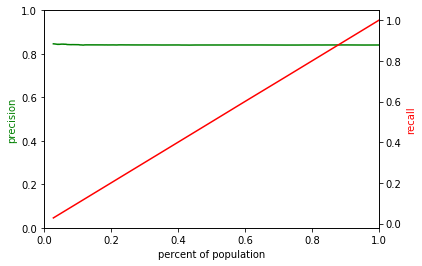

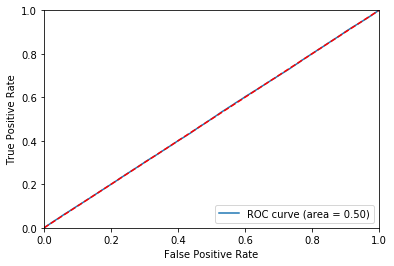

RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

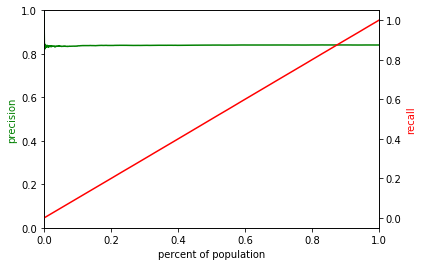

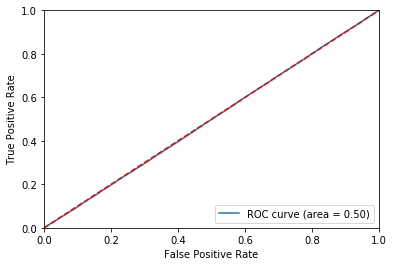

RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

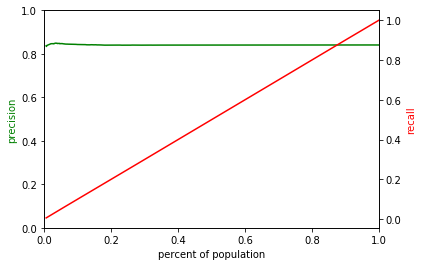

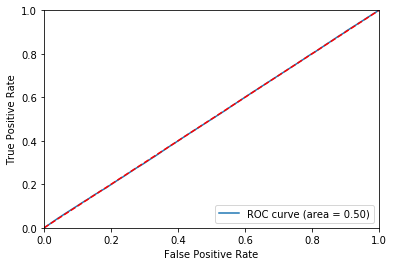

RF{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

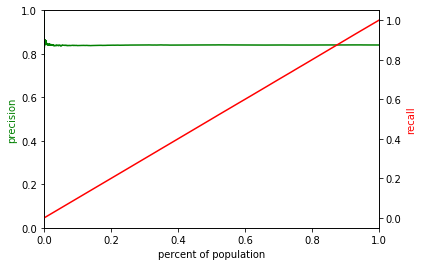

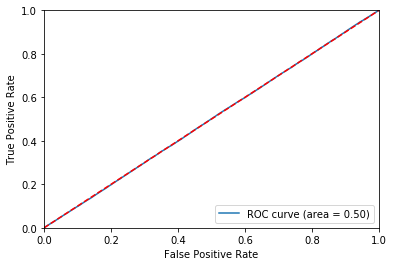

RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

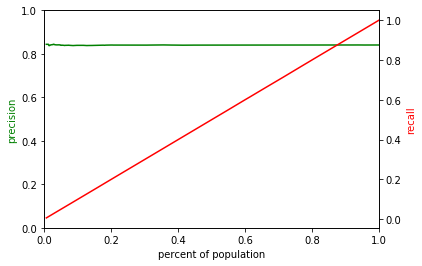

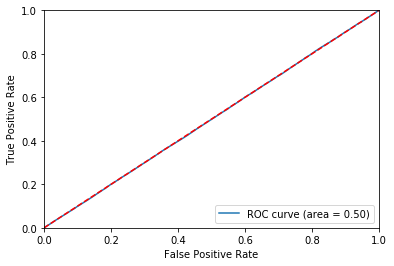

RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

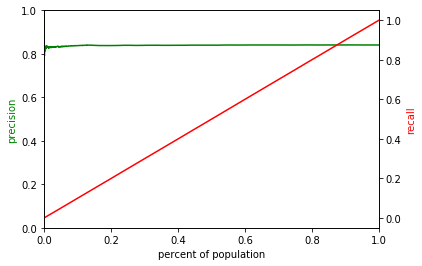

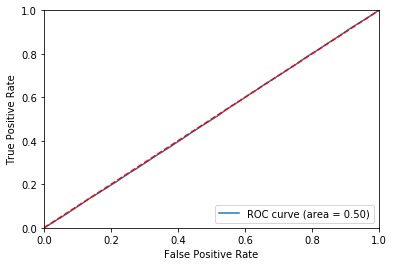

RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

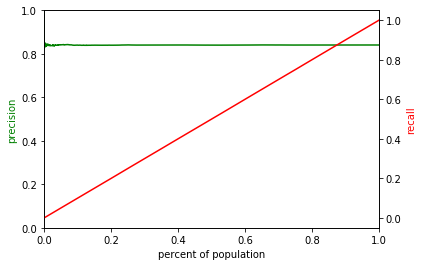

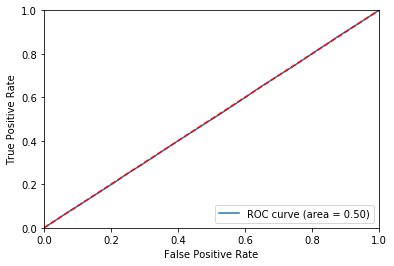

RF{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

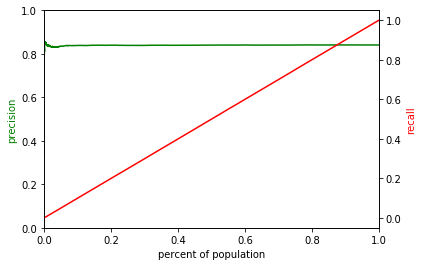

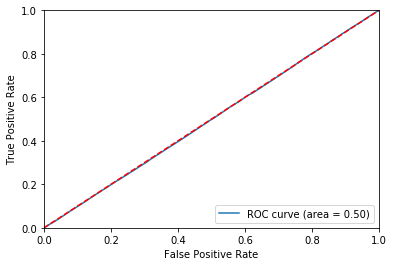

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

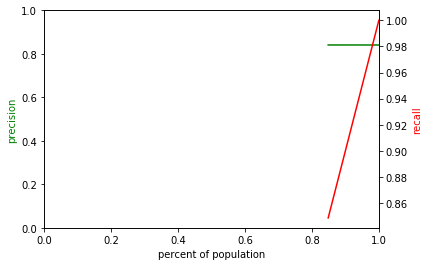

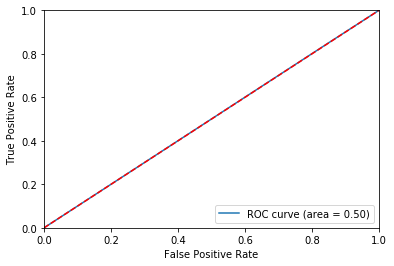

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

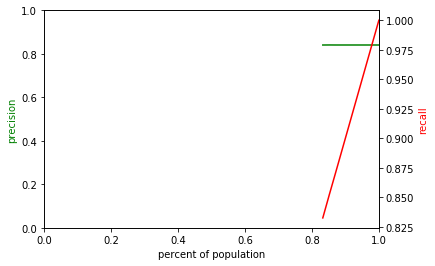

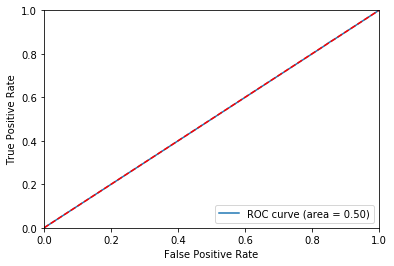

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

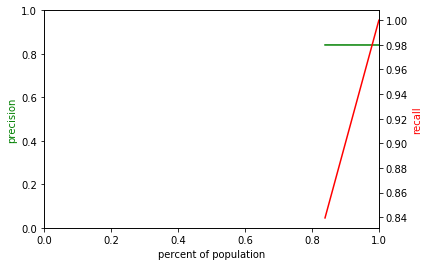

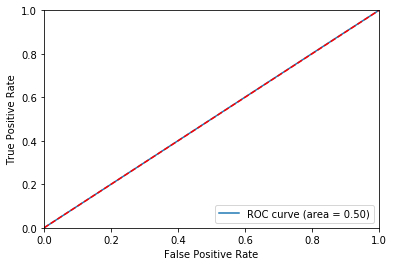

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

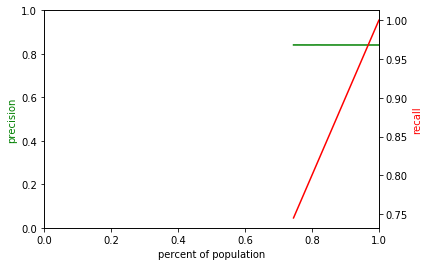

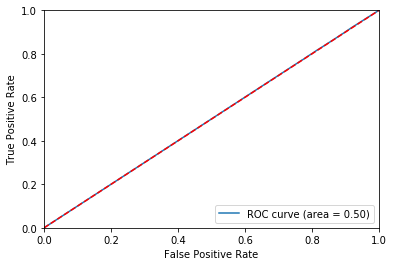

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

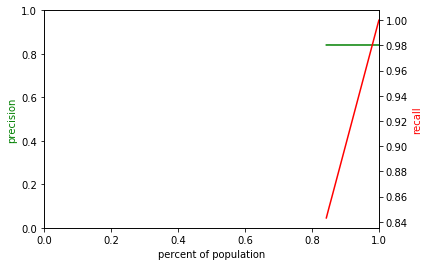

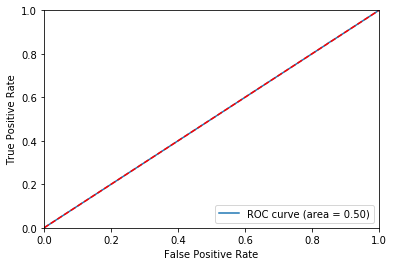

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

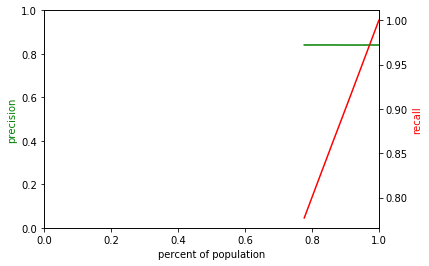

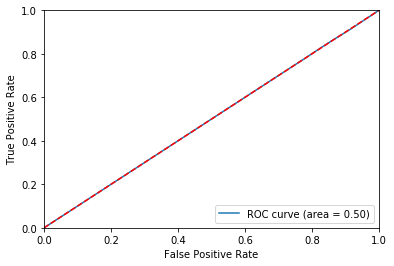

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

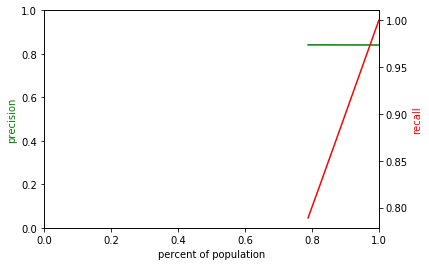

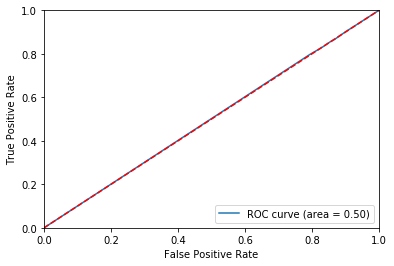

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RF{'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

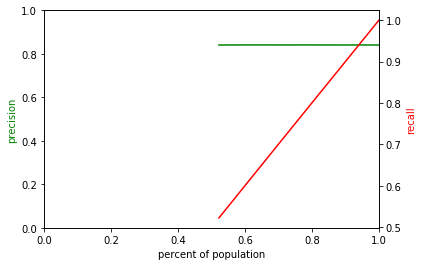

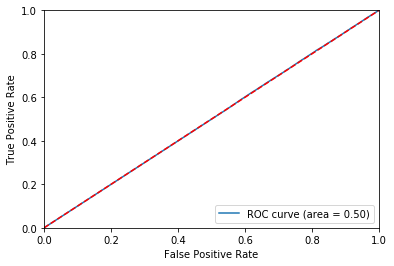

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

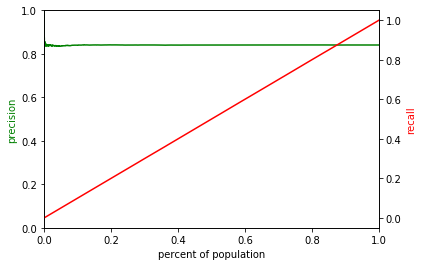

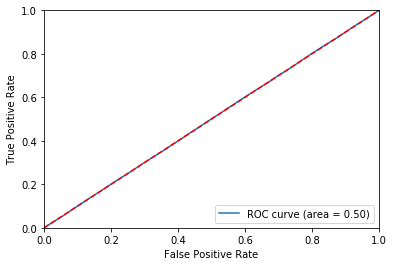

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

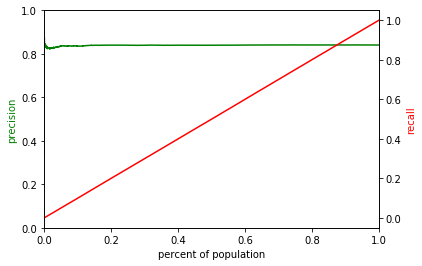

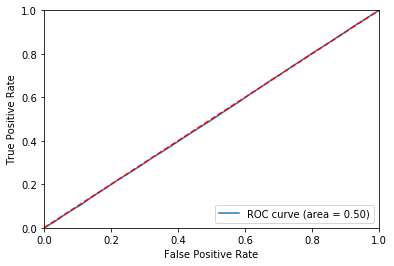

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

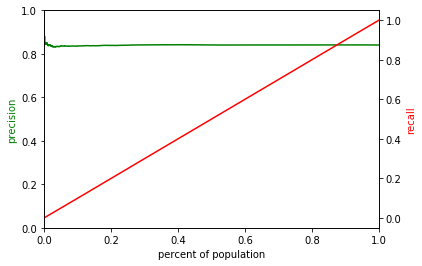

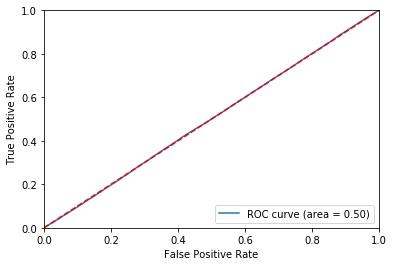

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

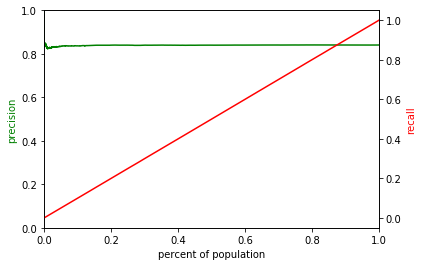

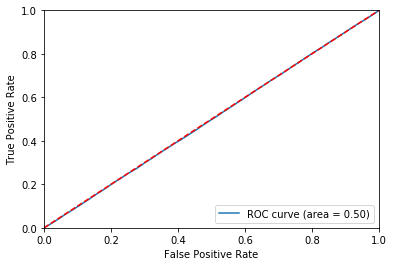

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

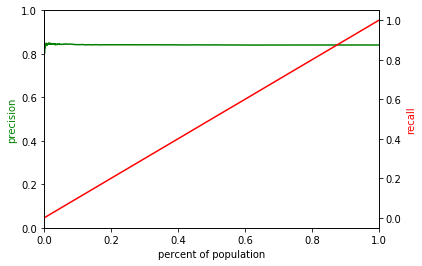

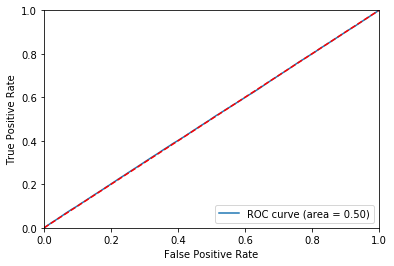

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

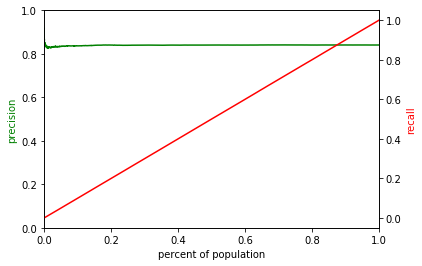

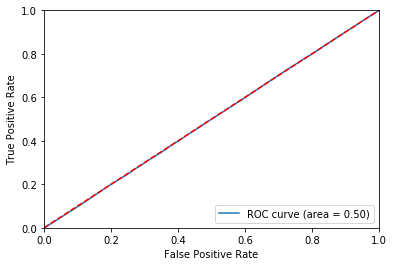

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

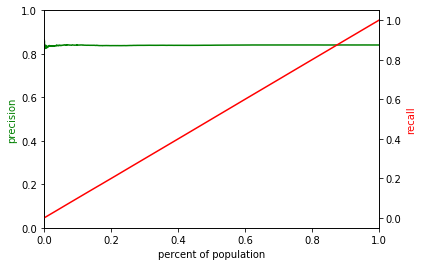

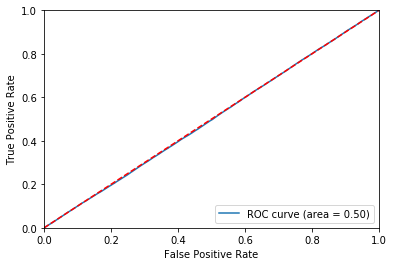

ET{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

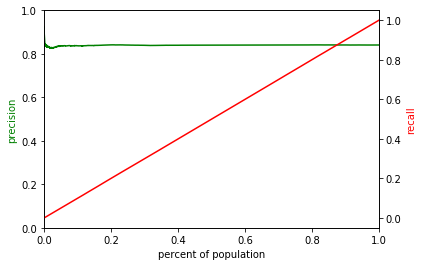

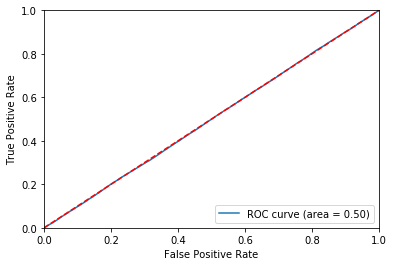

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

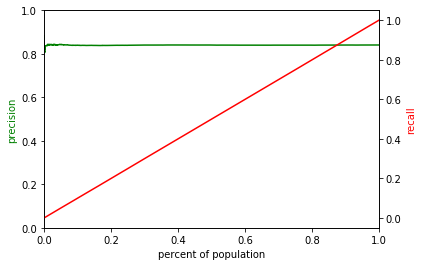

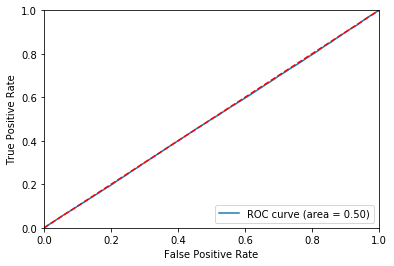

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

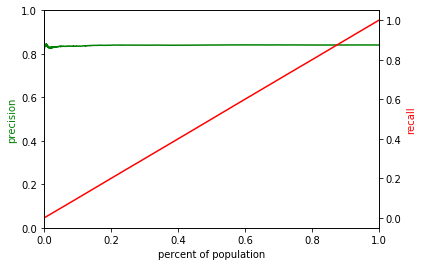

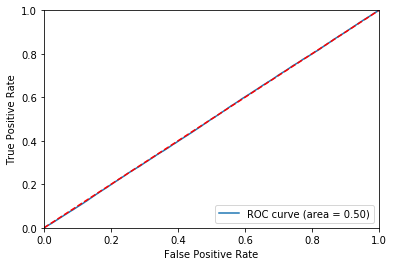

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

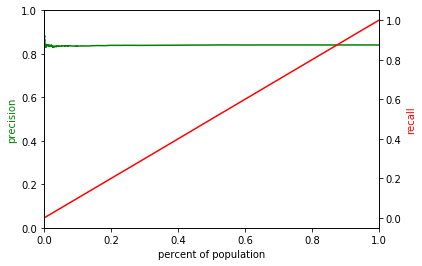

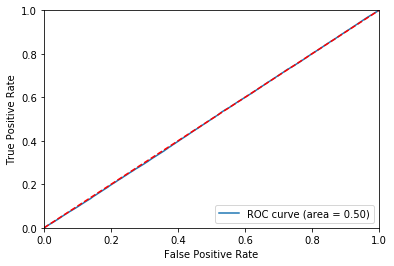

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

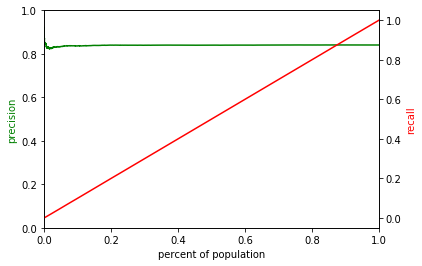

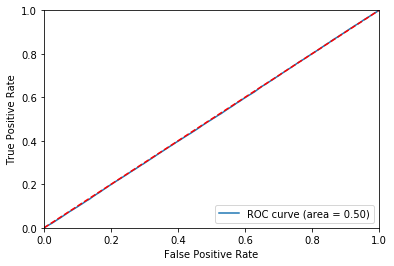

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

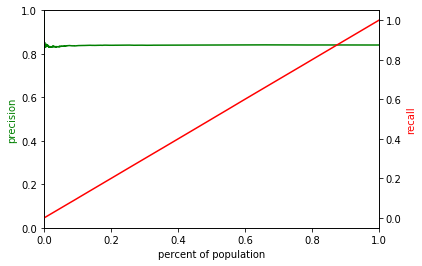

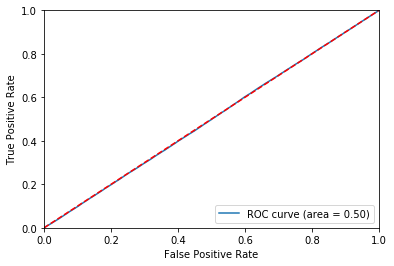

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

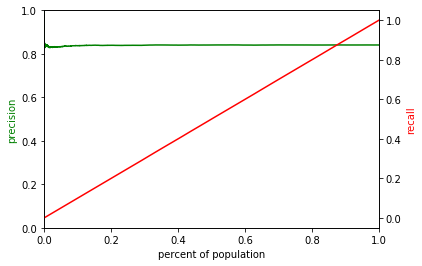

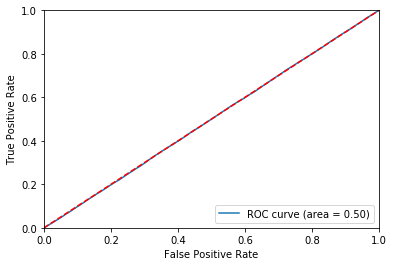

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

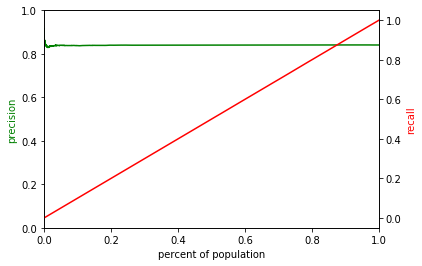

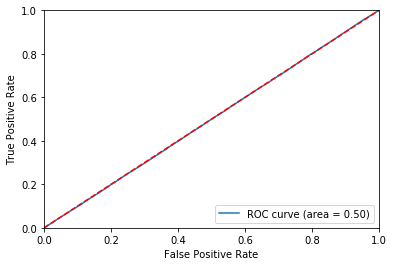

ET{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1}


<Figure size 432x288 with 0 Axes>

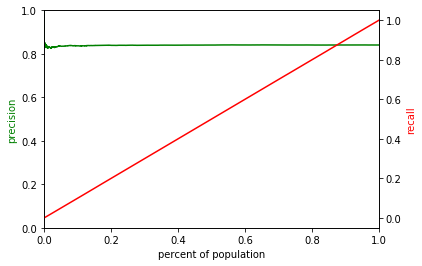

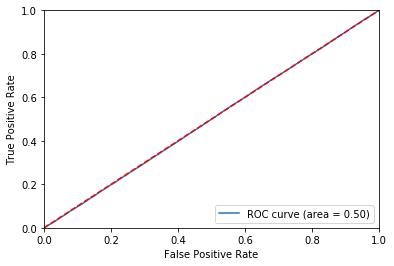

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AB{'algorithm': 'SAMME', 'n_estimators': 10}


<Figure size 432x288 with 0 Axes>

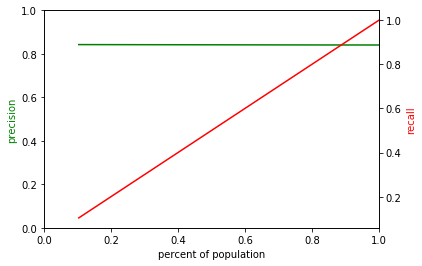

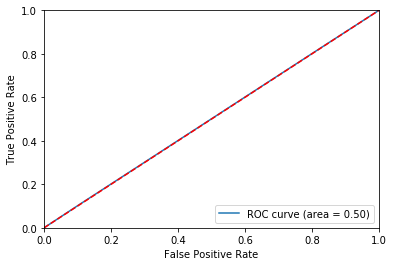

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AB{'algorithm': 'SAMME', 'n_estimators': 100}


<Figure size 432x288 with 0 Axes>

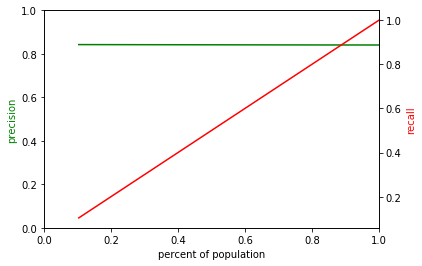

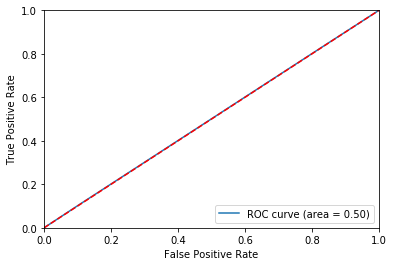

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AB{'algorithm': 'SAMME', 'n_estimators': 500}


<Figure size 432x288 with 0 Axes>

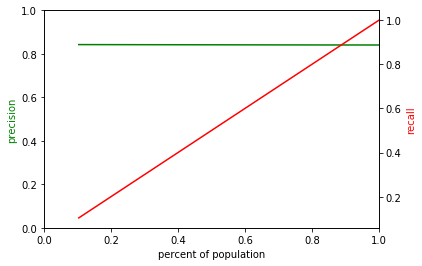

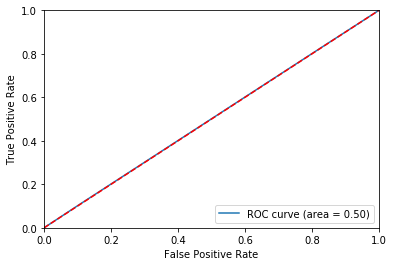

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AB{'algorithm': 'SAMME.R', 'n_estimators': 10}


<Figure size 432x288 with 0 Axes>

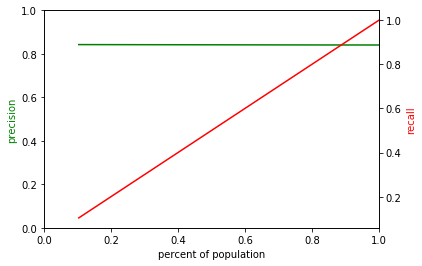

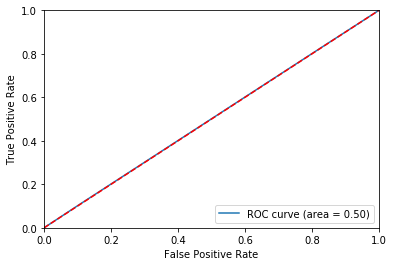

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dave/machine_learning/epa-rcra-violations/full_pipeline_files/model_analyzer.py:55: RuntimeWarning: invalid value encountered in double_scalars
  rv_dic[c] = [(prec * rec * 2) / (prec + rec)]
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AB{'algorithm': 'SAMME.R', 'n_estimators': 100}


<Figure size 432x288 with 0 Axes>

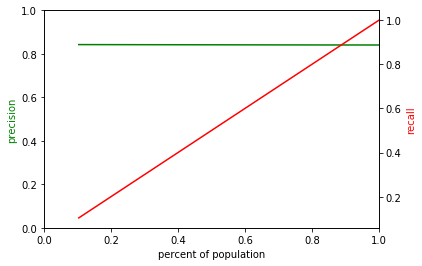

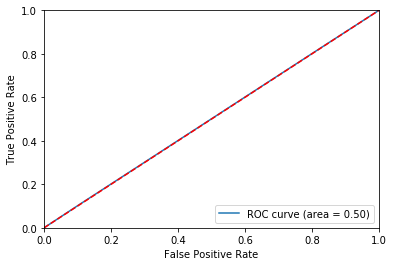

In [ ]:
predictions, models, stats = ml.model_analyzer_over_time(clfs, grid, 'show', thresholds, train_xs, train_ys, test_xs, test_ys, feats)

In [ ]:
predictions.head()

In [ ]:
stats.head()